In [1]:
# !python setup.py build_ext --inplace
!pip install -e .

Obtaining file:///content
  Preparing metadata (setup.py) ... done
  Running setup.py develop for scharr_cuda


Result saved as scharr_cuda_result.png


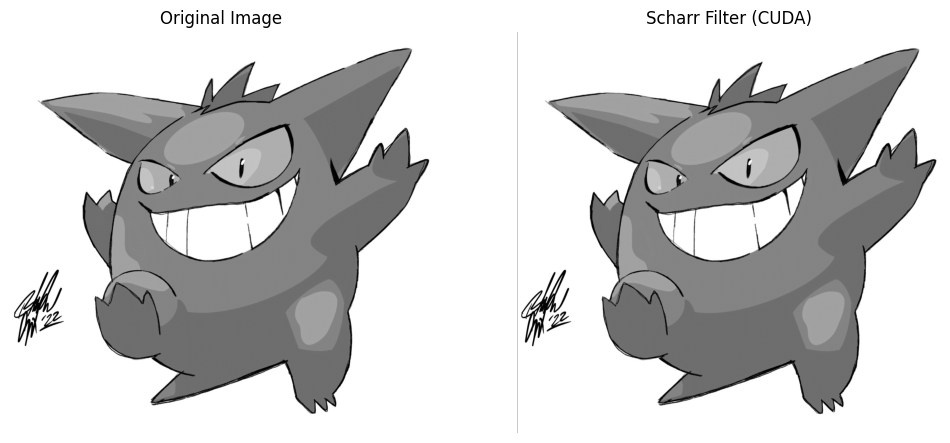

In [2]:
import torch
import scharr_cuda
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert to grayscale.
img = Image.open("pokemon.jpg").convert("L")
img_np = np.array(img).astype(np.float32)

# Convert to PyTorch tensor.
input_tensor = torch.from_numpy(img_np).cuda()

# Apply Prewitt filter using CUDA.
output_tensor = scharr_cuda.forward(input_tensor)

# Convert back to numpy for visualization.
output_np = output_tensor.cpu().numpy()

# Display the original and filtered images.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_np, cmap="gray")
plt.title("Scharr Filter (CUDA)")
plt.axis("off")

plt.savefig("scharr_cuda_result.png")
print("Result saved as scharr_cuda_result.png")